In [ ]:
from PIL import Image
import numpy as np
from PIL import ImageChops as chops
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

# Raport Lab 5 (09.11.2024)
Wykonany przez: Filip Połom



### Zad1

In [ ]:
def wstaw_inicjaly(obraz_bazowy, obraz_wstawiany, m, n, kolor):
    tab_obraz_wstawiany = np.asarray(obraz_wstawiany).astype(np.bool)
    (h0, w0) = tab_obraz_wstawiany.shape
    tab_obraz_bazowy = np.asarray(obraz_bazowy).astype(np.uint8)
    (h, w, c) = tab_obraz_bazowy.shape
    n_k = min(h, n + h0)
    m_k = min(w, m + w0)
    n_p = max(0, n)
    m_p = max(0, m)
    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            if not tab_obraz_wstawiany[i - n][j - m]:
                tab_obraz_bazowy[i][j] = kolor
    return Image.fromarray(tab_obraz_bazowy)

In [ ]:
inicjaly = Image.open('inicjaly.bmp')
im = Image.open('obraz.png')
im_inicjaly = wstaw_inicjaly(im, inicjaly, 0, im.height - inicjaly.height, [255, 255, 0])
im_inicjaly = wstaw_inicjaly(im_inicjaly, inicjaly, im_inicjaly.width - inicjaly.width, 0, [0, 255, 255])
im_inicjaly = wstaw_inicjaly(im_inicjaly, inicjaly, im_inicjaly.width - inicjaly.width // 2, im_inicjaly.height // 2 - inicjaly.height // 2, [255, 0, 255])
im_inicjaly.save('obraz_inicjaly.png')

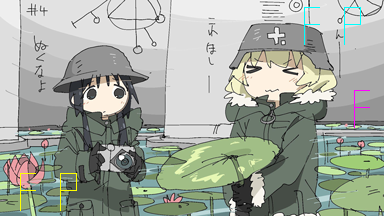

Obraz z inicjałami w trzech różnych miejscach

### Zad2

In [ ]:
for i in range(1, 5):
    obraz = Image.open(f'obraz{i}.jpg')
    obraz.save(f'obraz{i + 1}.jpg')

def takie_same(obraz1, obraz2):  # zwraca True gdy obrazy są takie same lub False w przeciwnym wypadku
    diff = chops.difference(obraz1, obraz2)
    tab = np.asarray(diff, np.bool)
    if obraz1.mode != obraz2.mode or obraz1.size != obraz2.size:
        return False
    return not np.any(tab)


def pokaz_roznice(obraz1, obraz2):  # wyrzuca obraz z ImageChops tylko używa do tego czarno białego obrazu,
    # tam gdzie jest różnica pixel będzie biały, w przeciwnym wypadku czarny
    if takie_same(obraz1, obraz2):
        return Image.fromarray(np.zeros(obraz1.size, dtype=np.bool))
    diff = chops.difference(obraz1, obraz2)
    tab = np.asarray(diff, np.bool)
    tab2d = np.all(tab, axis=2)
    return Image.fromarray(tab2d)

im = Image.open('obraz.png')
im_5 = Image.open('obraz5.jpg')
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.imshow(im)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(im_5)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(pokaz_roznice(im, im_5))
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('roznice_1_5.png')
plt.show()

im_4 = Image.open('obraz4.jpg')

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.imshow(im_4)
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(im_5)
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(pokaz_roznice(im_4, im_5))
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig('roznice_4_5.png')
plt.show()

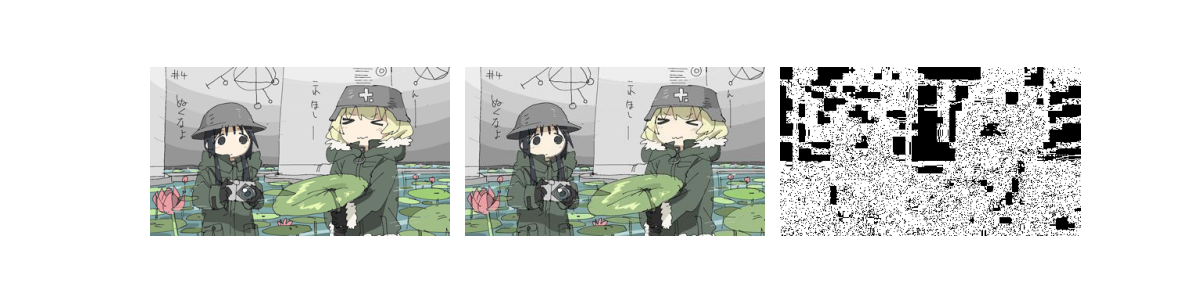

Różnice między oryginałem, a 5

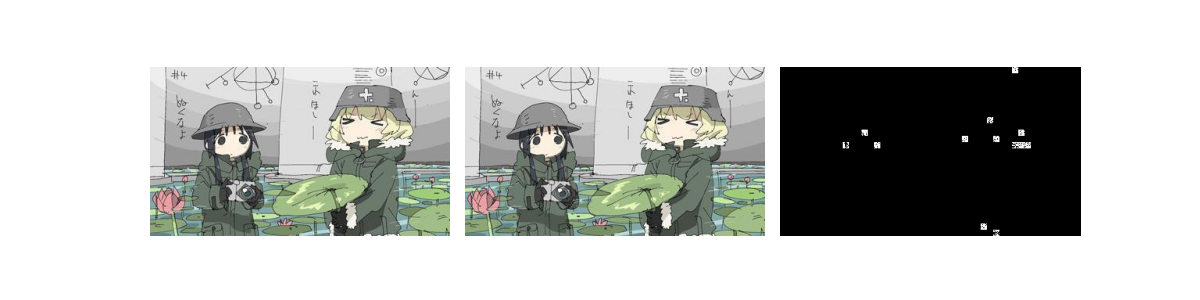

Różnice między 4, a 5

### Wnioski
* Każde kolejne zapisanie w formacie JPG pogarsza wynikowy obraz.
* Różnice między oryginalnym a 5 są większe, niż między 4 a 5.


### Zad 3

In [ ]:
def odkoduj(obraz1, obraz2):
    t_obraz1 = np.asarray(obraz1, np.int16)
    t_obraz2 = np.asarray(obraz2, np.int16)
    if t_obraz1.shape != t_obraz2.shape:
        raise TypeError("różne wymiary obrazów")
    h, w, d = t_obraz1.shape
    wynik = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            for k in range(d):
                a = t_obraz1[i, j, k]
                b = t_obraz2[i, j, k]
                if abs(a - b) in (1, 255):
                    wynik[i, j] = 255
                    break

    return Image.fromarray(wynik.astype(np.uint8))

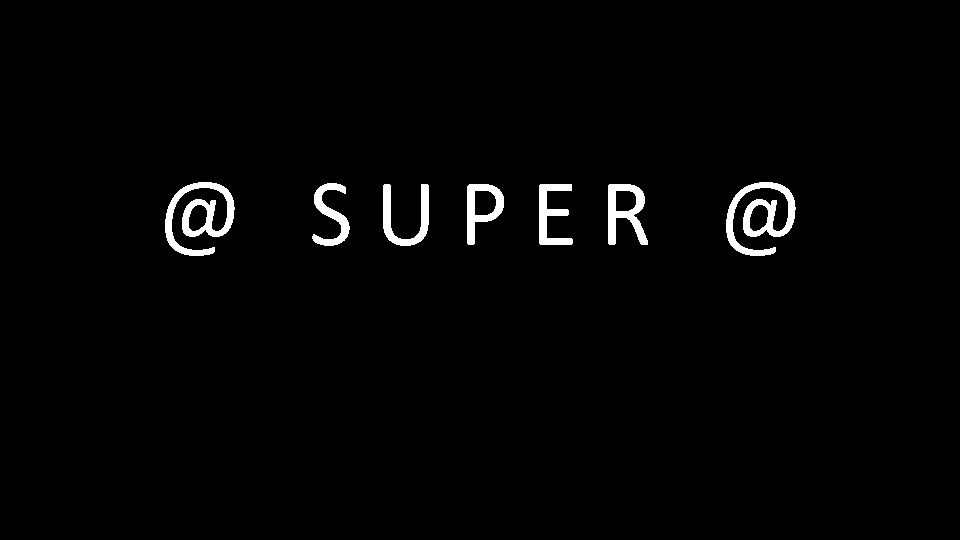

Ukryty kod w obrazie